In [250]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import json
import requests

# Load the datasets
There are 20 features inside movies csv file:
- budget
- genres
- homepage
- id
- keywords
- original_language
- original_title
- overview
- popularity
- production_companies
- production_countries
- release_date
- revenue
- runtime
- spoken_languages
- status
- tagline
- title
- vote_average
- vote_count


In [251]:
df_movies = pd.read_csv("datasets/analytic_report/tmdb_5000_movies.csv")

In [252]:
df_movies.describe(include="all")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,The incredible story of genius musician Wolfga...,NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Out of the Blue,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


In [253]:
df_movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [254]:
# Get the region for each country
# !curl -O https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.json
# !mv all.json countries.json

In [255]:
df_movies["country"] = df_movies["production_countries"].apply(lambda x: [country["iso_3166_1"] for country in json.loads(x)])
df_movies["company"] = df_movies["production_companies"].apply(lambda x: [company["name"] for company in json.loads(x)])

In [256]:
total_countries = []

for countries in df_movies["country"]:
    for country in countries:
        if country not in total_countries:
            total_countries.append(country)
    
print(f"Total countries in this dataset: {len(total_countries)}")

companies_data = json.loads(open("companies.json", "r").read())

# for companies in df_movies["company"]:
#     for company in companies:
#         if company not in companies_data:
#             companies_data[company] = {
#                 "origin_country": None
#             }

total_companies = list(companies_data.keys())
print(f"Total companies in this dataset: {len(total_companies)}")

Total countries in this dataset: 88
Total companies in this dataset: 5017


In [257]:
df_movies = df_movies[df_movies["country"].str.len() > 0]

By using TheMovieDB data (code below), I gather all the countries of the production companies to ensure which country gain the most profit

Currently, I choose the the country of the first company to hold the profit.

We can also distribute the revenue to each company with a predefined ratio.


In [258]:
# get the country information for the companies
# for company in total_companies:
#     print(company)
#     response = requests.get(f"https://api.themoviedb.org/3/search/company?api_key=3218acc56fdfdf9465300c9c2f8e4415&query={company}&page=1")
#     result = response.json()
    
#     if len(result["results"]) > 0 and result["results"][0]["origin_country"]:
#         companies_data[company]["origin_country"] = result["results"][0]["origin_country"]

# f = open("companies.json", "w+")
# f.write(json.dumps(companies_data))
# f.close()

In [259]:
index = 0

for company_name in companies_data:
    company = companies_data[company_name]
    
    if not company["origin_country"]:
        index += 1

print("Total companies having no country data:", index)

Total companies having no country data: 3428


In [260]:
# organize data by coninents
global_countries_1 = json.loads(open("countries.json", "r").read())
global_countries = {}

for country in global_countries_1:
    global_countries[country["alpha-2"]] = {
        "region": country["region"],
        "name": country["name"],
        "code": country["alpha-2"]
    }

In [261]:
# movies having no company or when company misses data,
# I use the first production country as the default one
df_movies["original_country"] = ""

for index, row in df_movies.iterrows():
    original_country = None
    
    if len(row["company"]) > 0:
        original_country = companies_data[row["company"][0]]["origin_country"]
        
        if original_country:
            original_country = global_countries[original_country]["code"]

    if not original_country and len(row["country"]) > 0:
        original_country = row["country"][0]
    
    if original_country:
        df_movies.at[index, "original_country"] = original_country
        
df_movies["original_country2"] = df_movies["country"].apply(lambda x: x[0])

In [262]:
# Compare the result
percentage = (df_movies["original_country"] == df_movies["original_country2"]).sum() / len(df_movies)
print("{0:.2f}% the original_countries = original_countries2".format(percentage * 100))

77.99% the original_countries = original_countries2


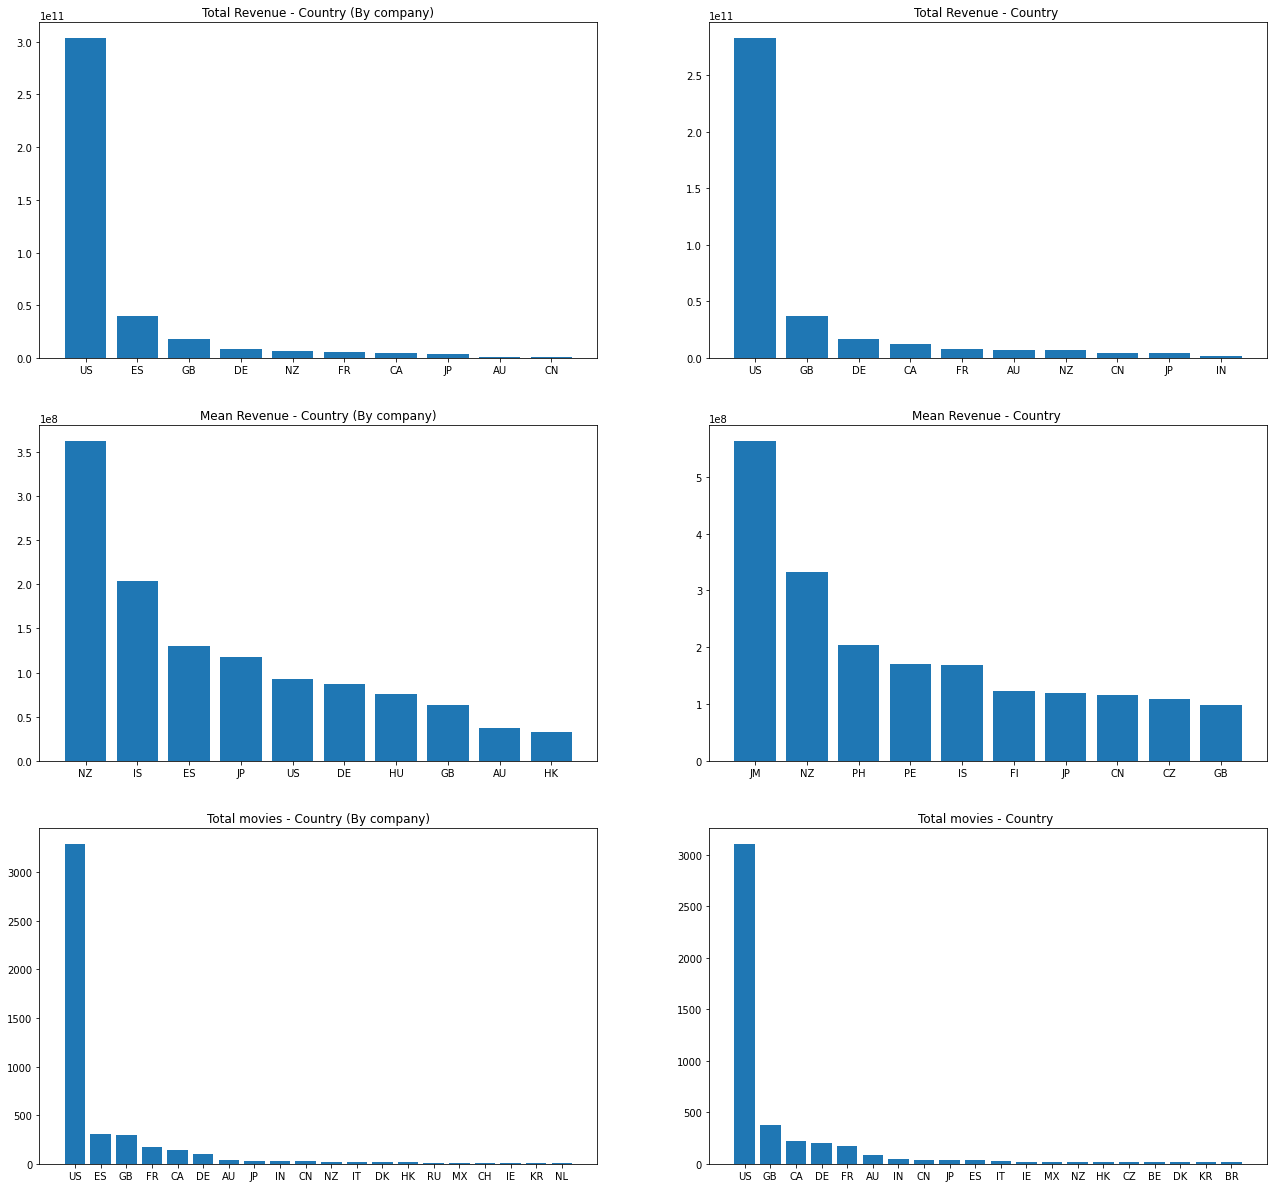

In [263]:
countries_by_company = df_movies.groupby("original_country")["revenue"].sum().sort_values(ascending=False)[:10]
countries = df_movies.groupby("original_country2")["revenue"].sum().sort_values(ascending=False)[:10]

countries_mean_by_company = df_movies.groupby("original_country")["revenue"].mean().sort_values(ascending=False)[:10]
countries_mean = df_movies.groupby("original_country2")["revenue"].mean().sort_values(ascending=False)[:10]

countries_size_by_company = df_movies.groupby("original_country")["revenue"].size().sort_values(ascending=False)[:20]
countries_size = df_movies.groupby("original_country2")["revenue"].size().sort_values(ascending=False)[:20]

fig, ax = plt.subplots(3, 2, figsize=(22, 21))

ax[0][0].bar(countries_by_company.index, countries_by_company.values)
ax[0][0].set_title("Total Revenue - Country (By company)")
ax[0][1].bar(countries.index, countries.values)
ax[0][1].set_title("Total Revenue - Country ")
ax[1][0].bar(countries_mean_by_company.index, countries_mean_by_company.values)
ax[1][0].set_title("Mean Revenue - Country (By company)")
ax[1][1].bar(countries_mean.index, countries_mean.values)
ax[1][1].set_title("Mean Revenue - Country ")
ax[2][0].bar(countries_size_by_company.index, countries_size_by_company.values)
ax[2][0].set_title("Total movies - Country (By company)")
ax[2][1].bar(countries_size.index, countries_size.values)
ax[2][1].set_title("Total movies - Country ")
plt.show()

When measuring the revenune of the countries not based on the companies, we can see that the mean revenue of Jamaica is the highest mean revenue.

Actually the movie was produced in Jamaica but it's the American movie (Pirates of the Caribbean was filmed in Jamaica). I also show the top 10 countries having the highest revenue. As we can see, the order of revenue of the top 10 countries is different when getting country from company.

So I think the production_countries are not a reliable features to define as the original country

In [264]:
df_movies[df_movies["original_country2"] == "JM"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,country,company,original_country,original_country2
12,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,58,"[{""id"": 616, ""name"": ""witch""}, {""id"": 663, ""na...",en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246,"[JM, US, BS, DM]","[Walt Disney Pictures, Jerry Bruckheimer Films...",US,JM
4339,950000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.mgm.com/#/our-titles/566/Dr.-No,646,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,Dr. No,"In the film that launched the James Bond saga,...",48.901542,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NOW meet the most extraordinary gentleman spy ...,Dr. No,6.9,940,"[JM, GB]","[United Artists, Eon Productions]",US,JM


In [265]:
df_movies["continent"] = df_movies["original_country"].apply(lambda x: global_countries[x]["region"])

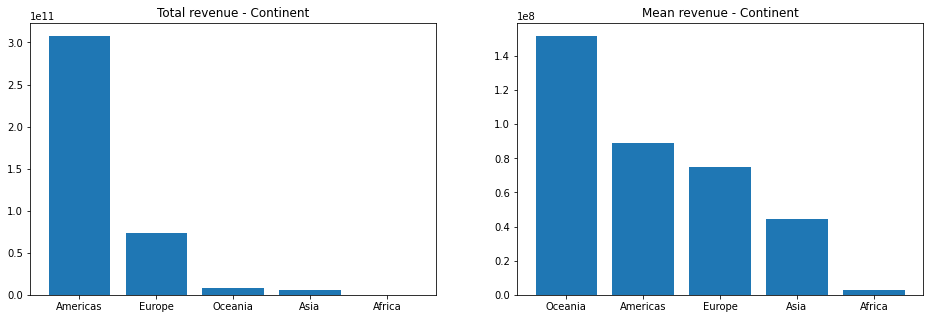

In [266]:
# from the charts, even though the total revenue of Americas is way more higher,
# but Oceania has the higher mean revenue than Americas.
# It seems like the least popular movies of Americas drags the mean value down
continents = df_movies.groupby("continent")["revenue"].sum().sort_values(ascending=False)
continents_mean = df_movies.groupby("continent")["revenue"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].bar(continents.index, continents.values)
ax[0].set_title("Total revenue - Continent")

ax[1].bar(continents_mean.index, continents_mean.values)
ax[1].set_title("Mean revenue - Continent")
plt.show()

## How is a movie’s revenue and average score affected by its genre?

In [267]:
# reload dataset
df_movies = pd.read_csv("datasets/analytic_report/tmdb_5000_movies.csv")

In [268]:
df_movies = df_movies[df_movies["release_date"].notnull()]

In [269]:
# analyze genres and release date
df_movies["release_year"] = df_movies["release_date"].apply(lambda x: float(x[:4]))
df_movies["release_decade"] = df_movies["release_year"].apply(lambda x: str(int(x // 10)) + "x")
df_movies["genre_names"] = df_movies["genres"].apply(lambda x: [e["name"] for e in json.loads(x)])
df_movies["genre_length"] = df_movies["genre_names"].apply(lambda x: len(x))

In [270]:
df_movies = df_movies[df_movies["genre_length"] != 0]

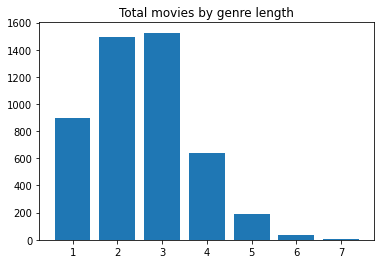

In [271]:
# the majority of movies have the number of genres higher than 2
movies_by_genre_length = df_movies.groupby("genre_length").size()
plt.bar(movies_by_genre_length.index, movies_by_genre_length.values)
plt.title("Total movies by genre length")
plt.show()

In [272]:
# after reviewing several movies, I can see that the first genre is the main one
for index, movie in df_movies.sort_values(by="popularity", ascending=False)[:30].iterrows():
    print(movie["original_title"])
    print(movie["genre_names"])
    print("-----------------")

Minions
['Family', 'Animation', 'Adventure', 'Comedy']
-----------------
Interstellar
['Adventure', 'Drama', 'Science Fiction']
-----------------
Deadpool
['Action', 'Adventure', 'Comedy']
-----------------
Guardians of the Galaxy
['Action', 'Science Fiction', 'Adventure']
-----------------
Mad Max: Fury Road
['Action', 'Adventure', 'Science Fiction', 'Thriller']
-----------------
Jurassic World
['Action', 'Adventure', 'Science Fiction', 'Thriller']
-----------------
Pirates of the Caribbean: The Curse of the Black Pearl
['Adventure', 'Fantasy', 'Action']
-----------------
Dawn of the Planet of the Apes
['Science Fiction', 'Action', 'Drama', 'Thriller']
-----------------
The Hunger Games: Mockingjay - Part 1
['Science Fiction', 'Adventure', 'Thriller']
-----------------
Big Hero 6
['Adventure', 'Family', 'Animation', 'Action', 'Comedy']
-----------------
Terminator Genisys
['Science Fiction', 'Action', 'Thriller', 'Adventure']
-----------------
Captain America: Civil War
['Adventure', 

In [282]:
genre_names = []
print("Genre names:")

for index, movie in df_movies.iterrows():
    for genre in movie["genre_names"]:
        if genre not in genre_names:
            genre_names.append(genre)
            print(genre)
            
print("-------")
print(f"Total genres: {len(genre_names)}")

Action
Adventure
Fantasy
Science Fiction
Crime
Drama
Thriller
Animation
Family
Western
Comedy
Romance
Horror
Mystery
History
War
Music
Documentary
Foreign
TV Movie
-------
Total genres: 20


In [274]:
df_movies["original_genre"] = df_movies["genre_names"].apply(lambda x: x[0])

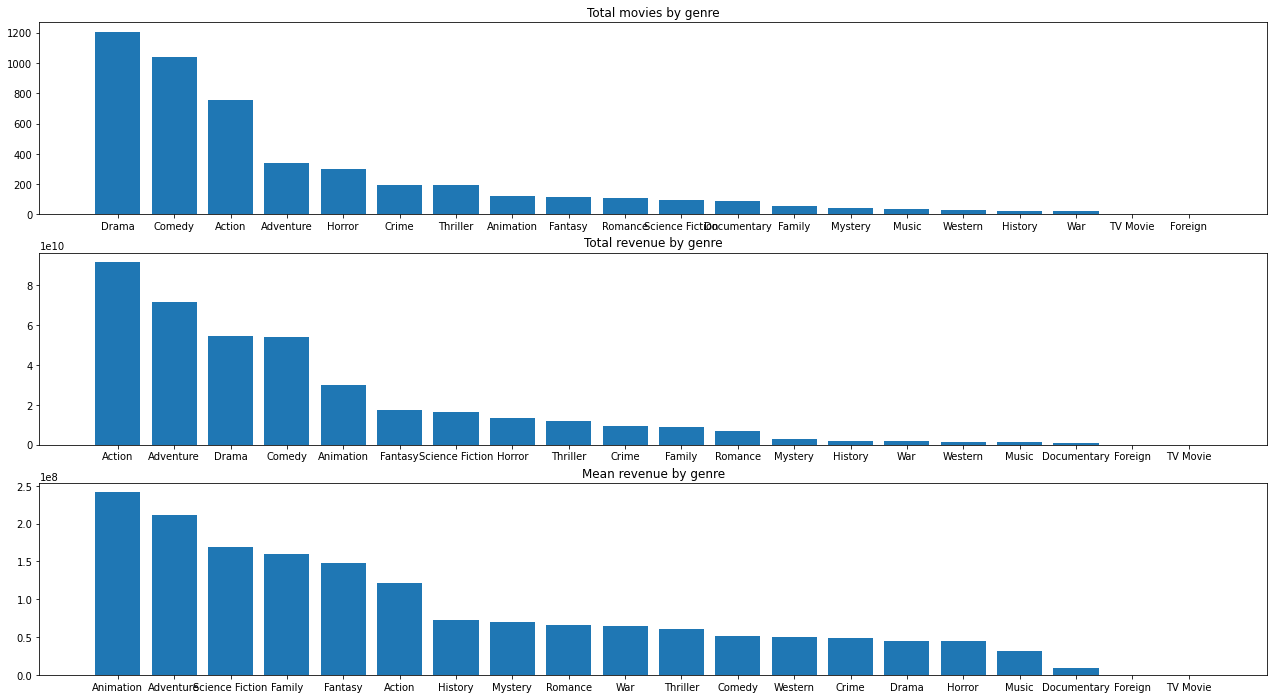

In [341]:
total_movies_by_genre = df_movies.groupby("original_genre").size().sort_values(ascending=False)
total_revenue_by_genre = df_movies.groupby("original_genre")["revenue"].sum().sort_values(ascending=False)
mean_revenue_by_genre = df_movies.groupby("original_genre")["revenue"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(3, 1, figsize=(22, 12))

ax[0].bar(total_movies_by_genre.index, total_movies_by_genre.values)
ax[0].set_title("Total movies by genre")

ax[1].bar(total_revenue_by_genre.index, total_revenue_by_genre.values)
ax[1].set_title("Total revenue by genre")

ax[2].bar(mean_revenue_by_genre.index, mean_revenue_by_genre.values)
ax[2].set_title("Mean revenue by genre")
plt.show()

# action genre earns the highest money

Even thoguh total revenue of action movies is the highest, we still can see that animation has the highest average revenue compared to other genres. So by average, an animation movie after release can make roughly two times revenue compared to action movies

### Trend of genre by year and their revenue

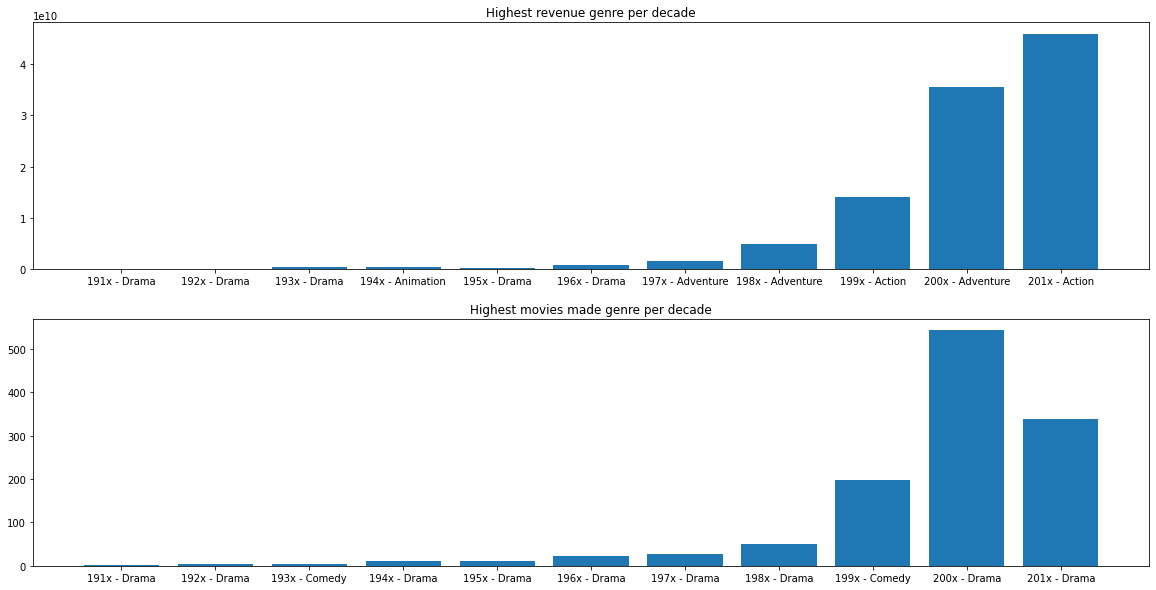

In [276]:
revenue_by_decades_genres = df_movies.groupby(["release_decade", "original_genre"], as_index=False)["revenue"].sum().sort_values(["release_decade", "revenue"], ascending=[False, False])
revenue_by_decades_genres_bk = revenue_by_decades_genres
revenue_by_decades_genres = revenue_by_decades_genres.groupby(["release_decade"], as_index=False).first()

total_movies_by_decades_genres = df_movies.groupby(["release_decade", "original_genre"], as_index=False).size().to_frame("size").reset_index().sort_values(["release_decade", "size"], ascending=[False, False])
total_movies_by_decades_genres_bk = total_movies_by_decades_genres
total_movies_by_decades_genres = total_movies_by_decades_genres.groupby(["release_decade"], as_index=False).first()

decades, decade_genres, revenue = revenue_by_decades_genres["release_decade"], revenue_by_decades_genres["original_genre"], revenue_by_decades_genres["revenue"]
indices = [f"{text} - {decade_genres[i]}" for i, text in enumerate(decades)]

decades2, decade_genres2, sizes2 = total_movies_by_decades_genres["release_decade"], total_movies_by_decades_genres["original_genre"], total_movies_by_decades_genres["size"]
indices2 = [f"{text} - {decade_genres2[i]}" for i, text in enumerate(decades2)]

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].bar(indices, revenue)
ax[0].set_title("Highest revenue genre per decade")
ax[1].bar(indices2, sizes2)
ax[1].set_title("Highest movies made genre per decade")
plt.show()

Even though drama movies has been made by companies dominantly (lower cost & cinematography), but the its revenue is still lower than action movies. And we also can see that there are an increasing trend of revenue from action movies

### Evaluation between total movies and revenue

In [281]:
pd.set_option('display.max_rows', 150)

revenue_by_decades_genres_bk = revenue_by_decades_genres_bk.sort_values(["release_decade", "original_genre"])
revenue_by_decades_genres_bk["total_movies"] = total_movies_by_decades_genres_bk.sort_values(["release_decade", "original_genre"])["size"]

# evaluate betwwen total movies and revenue
revenue_by_decades_genres_bk = revenue_by_decades_genres_bk.sort_values(["release_decade", "revenue"], ascending=[False, False])
revenue_by_decades_genres_bk["mean_revenue"] = revenue_by_decades_genres_bk["revenue"] // revenue_by_decades_genres_bk["total_movies"]

revenue_by_decades_genres_bk[:30]

,release_decade,original_genre,revenue,total_movies,mean_revenue
106,201x,Action,45854550185,224,204707813
107,201x,Adventure,19265698079,73,263913672
109,201x,Comedy,16455285692,265,62095417
112,201x,Drama,15441139837,337,45819406
108,201x,Animation,15211099290,49,310430597
121,201x,Science Fiction,9376136241,37,253409087
114,201x,Fantasy,5860197854,31,189038640
113,201x,Family,5195596054,26,199830617
123,201x,Thriller,4682225478,105,44592623
117,201x,Horror,4368221595,102,42825701


Total and mean revenue don't share the same genre together, as we can see from the above table, Animation and Adventure movies' revenue are way more higher than action movies

## How is a movie’s average score affected by its genre

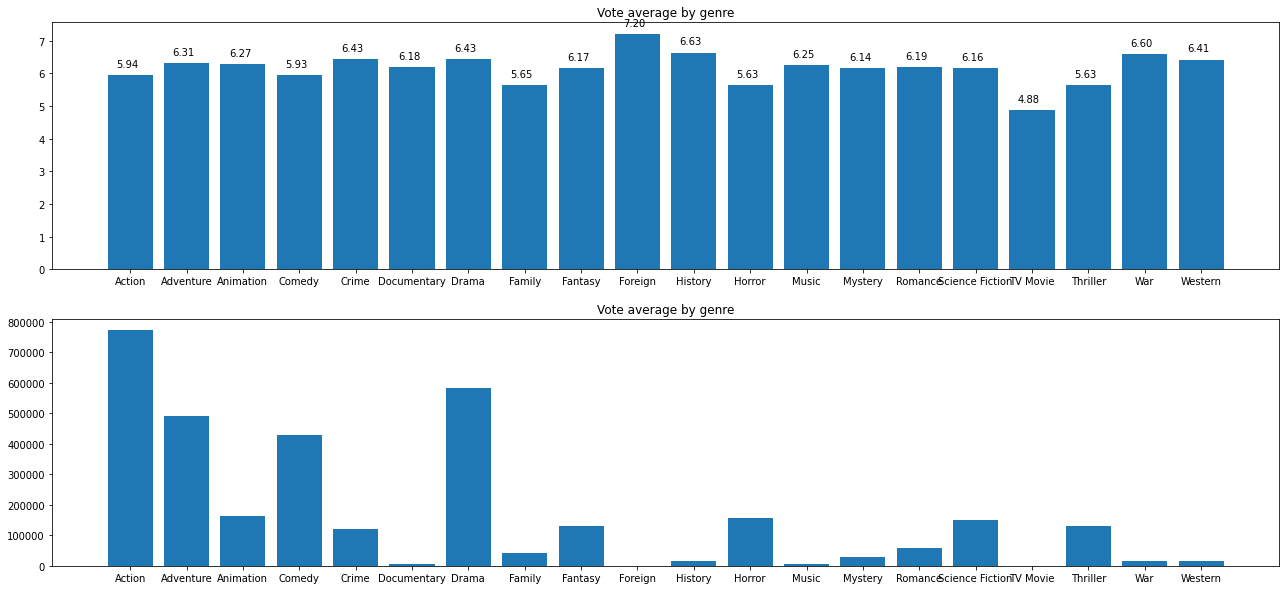

In [300]:
vote_avg_by_genre = df_movies.groupby("original_genre")["vote_average"].mean()
vote_count_by_genre = df_movies.groupby("original_genre")["vote_count"].sum()

fig, ax = plt.subplots(2, 1, figsize=(22, 10))
ax[0].bar(vote_avg_by_genre.index, vote_avg_by_genre.values)
ax[0].set_title("Vote average by genre")

for i, value in enumerate(vote_avg_by_genre.values):
    ax[0].text(i - .25, value + 0.25, "%.2f" % value, color='black')
    
ax[1].bar(vote_count_by_genre.index, vote_count_by_genre.values)
ax[1].set_title("Vote count by genre")

plt.show()

I am not sure how to evaluate "how movies' average score are affected by their genres", absolutely there are many arguments toward a movie, so the opinions can lead to the increase or decrease of the average score. But I guess the high score belongs to the movies having the historical, war, new and exceptional feelings (adventure, drama, ...).

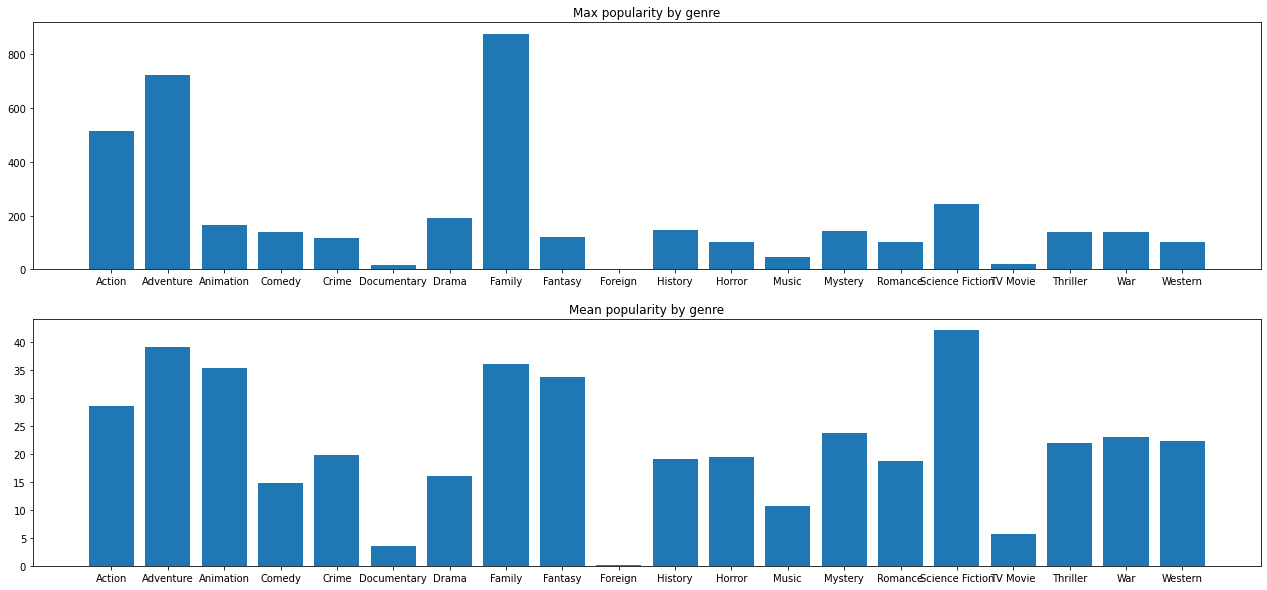

In [339]:
most_popular_movy_ids = df_movies.groupby("original_genre")["popularity"].idxmax().values.tolist()

max_popularity_by_genre = df_movies.groupby("original_genre")["popularity"].max().reset_index()
max_popularity_by_genre["title"] = df_movies.iloc[most_popular_movy_ids]["original_title"].values

popularity_by_genre = df_movies.groupby("original_genre")["popularity"].mean()

fig, ax = plt.subplots(2, 1, figsize=(22, 10))
ax[0].bar(max_popularity_by_genre["original_genre"], max_popularity_by_genre["popularity"])
ax[0].set_title("Max popularity by genre")
ax[1].bar(popularity_by_genre.index, popularity_by_genre.values)
ax[1].set_title("Mean popularity by genre")
plt.show()

## What influence does release date have on revenue?

### Calculate total revenue based on decade
We can see from the below chart that the revenue is increasing by decade, indicating the demand of entertainment in our life. And based on the data, the last movie is in 2017, not the end of the 201x decade, so it's obvious that revenue of 200x is relatively higher than 201x.

Besides, in a year, the summer (5-6-7) and the winter (11-12) attracts more revenue than the other months. In general, the summer of students lasts from May to August or June to Mid-August, so the target clients can enjoy their favourite genre in this time. And in the later time of the year, there are many events and holidays happen all around the world, so movies revenue is also high.

In [361]:
from datetime import date
import calendar

In [366]:
df_movies["release_month"] = df_movies["release_date"].apply(lambda x: x[5:7])
df_movies["release_day"] = df_movies["release_date"].apply(lambda x: x[8:])
df_movies["release_day_of_week"] = df_movies["release_date"].apply(lambda x: date.fromisoformat(x).weekday())

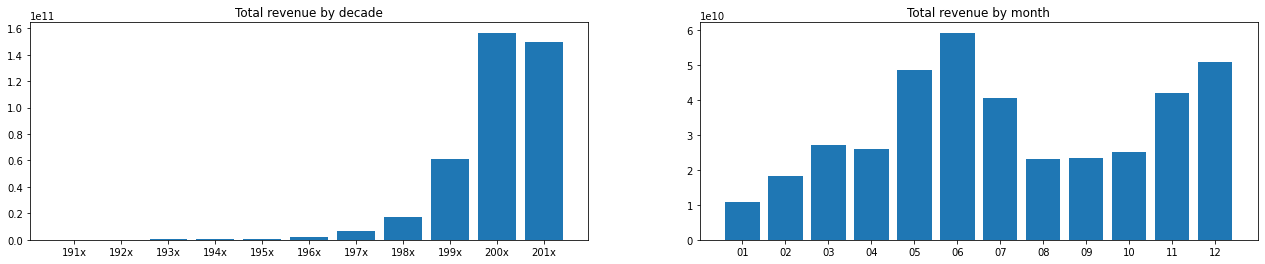

In [354]:
revenue_by_decade = df_movies.groupby("release_decade")["revenue"].sum()
revenue_by_month = df_movies.groupby("release_month")["revenue"].sum()

fig, ax = plt.subplots(1, 2, figsize=(22, 4))
ax[0].bar(revenue_by_decade.index, revenue_by_decade.values)
ax[0].set_title("Total revenue by decade")
ax[1].bar(revenue_by_month.index, revenue_by_month.values)
ax[1].set_title("Total revenue by month")

plt.show()

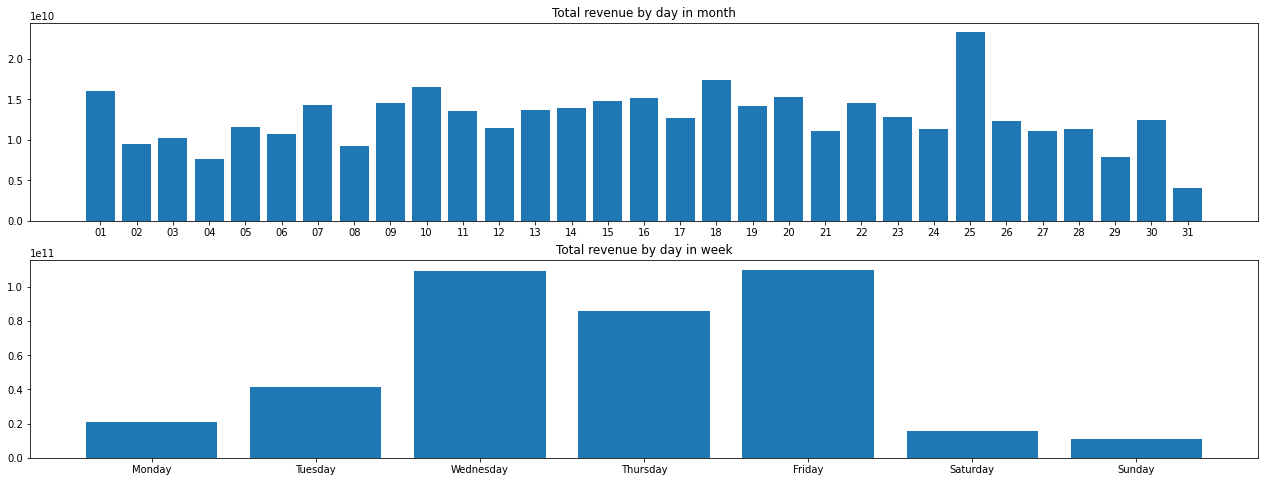

In [369]:
revenue_by_day = df_movies.groupby("release_day")["revenue"].sum()
revenue_by_day_of_week = df_movies.groupby("release_day_of_week")["revenue"].sum().sort_index()

fig, ax = plt.subplots(2, 1, figsize=(22, 8))
ax[0].bar(revenue_by_day.index, revenue_by_day.values)
ax[0].set_title("Total revenue by day in month")
ax[1].bar([calendar.day_name[i] for i in revenue_by_day_of_week.index], revenue_by_day_of_week.values)
ax[1].set_title("Total revenue by day in week")
plt.show()

The distribution of revenue by day of month gives the interesting insight, revenue of the first days (01 - 08) is not very high in total

Besides, the revenue of middweeks is significantly higher than the other days, one factor is that the ticket costs in the midweeks are lower than the weekends.

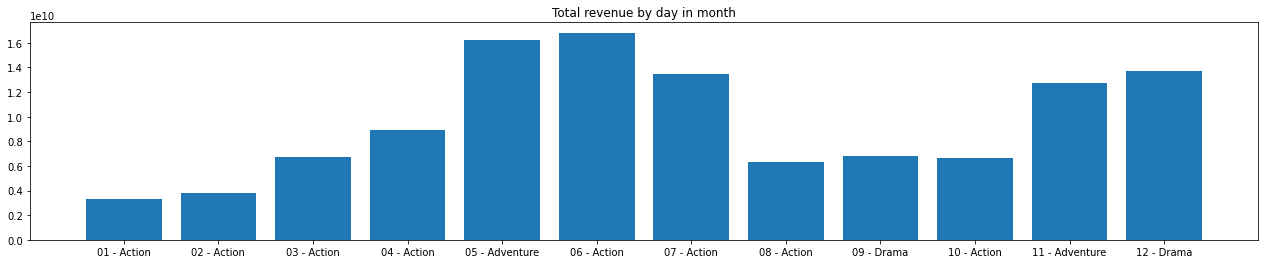

In [374]:
revenue_by_months_genres = df_movies.groupby(["release_month", "original_genre"], as_index=False)["revenue"].sum().sort_values(["release_month", "revenue"], ascending=[False, False])
revenue_by_months_genres = revenue_by_months_genres.groupby(["release_month"], as_index=False).first()

months, month_genres, revenue = revenue_by_months_genres["release_month"], revenue_by_months_genres["original_genre"], revenue_by_months_genres["revenue"]
indices = [f"{text} - {month_genres[i]}" for i, text in enumerate(months)]

fig, ax = plt.subplots(1, 1, figsize=(22, 4))
ax.bar(indices, revenue)
ax.set_title("Total revenue by day in month")
plt.show()